<a href="https://colab.research.google.com/github/yashraj02/CNN-Animals_Classification/blob/master/MiniVGGNet_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Activation,Flatten,BatchNormalization,Dense
from keras.optimizers import SGD
from sklearn.metrics import classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0

In [0]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [0]:
# miniVGGNet without BatchNormalization
def miniVGGNet(width,height,depth,classes):
  model = tf.keras.models.Sequential()
  
  model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(height,width,depth), activation='relu'))
  model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(2,2))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
  model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
  model.add(tf.keras.layers.MaxPool2D(2,2))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Dense(classes))
  model.add(tf.keras.layers.Activation('softmax'))

  return model

In [0]:
# miniVGGNet_BN using BatchNormalization
def miniVGGNet_BN(width,height,depth,classes):
  model = tf.keras.models.Sequential()
  
  model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(height,width,depth), activation='relu'))
  model.add(tf.keras.layers.BatchNormalization(axis=-1))
  model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
  model.add(tf.keras.layers.BatchNormalization(axis=-1))
  model.add(tf.keras.layers.MaxPool2D(2,2))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
  model.add(tf.keras.layers.BatchNormalization(axis=-1))
  model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
  model.add(tf.keras.layers.BatchNormalization(axis=-1))
  model.add(tf.keras.layers.MaxPool2D(2,2))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.BatchNormalization(axis=-1))
  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Dense(classes))
  model.add(tf.keras.layers.Activation('softmax'))

  return model

In [27]:
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [43]:
print("[INFO] training without BatchNormalization..")
model1 = miniVGGNet(32,32,3,10)
opti = tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.01/40, momentum=0.9, nesterov=True)
print("[INFO] compiling model1 network..")
model1.compile(loss="categorical_crossentropy", optimizer=opti, metrics=['accuracy'])
non_bn_model = model1.fit(x_train,y_train,batch_size=32,epochs=40,verbose=1,validation_data=(x_test,y_test))

[INFO] training without BatchNormalization..
[INFO] compiling model1 network..
Epoch 1/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7892 - accuracy: 0.3379 - val_loss: 1.4448 - val_accuracy: 0.4838
Epoch 2/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3483 - accuracy: 0.5128 - val_loss: 1.1672 - val_accuracy: 0.5871
Epoch 3/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1822 - accuracy: 0.5792 - val_loss: 1.0294 - val_accuracy: 0.6366
Epoch 4/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0707 - accuracy: 0.6197 - val_loss: 0.9439 - val_accuracy: 0.6664
Epoch 5/40
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9815 - accuracy: 0.6536 - val_loss: 0.8772 - val_accuracy: 0.6974
Epoch 6/40
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9117 - accuracy: 0.6779 - val_loss: 0.8292 - val_accuracy: 0.7132
Epoch 7/40
1563/1563 [==============================] - 7

In [29]:
predictions = model1.predict(x_test,batch_size=64)
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.83      0.82      0.83      1000
  automobile       0.91      0.90      0.90      1000
        bird       0.76      0.66      0.71      1000
         cat       0.67      0.62      0.64      1000
        deer       0.75      0.80      0.77      1000
         dog       0.70      0.75      0.73      1000
        frog       0.81      0.88      0.85      1000
       horse       0.86      0.83      0.84      1000
        ship       0.88      0.89      0.88      1000
       truck       0.87      0.89      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



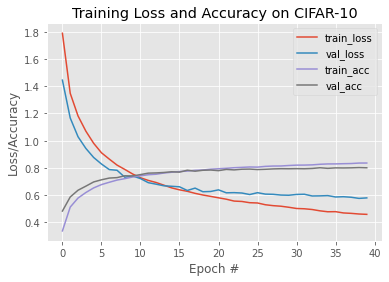

In [49]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), non_bn_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), non_bn_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), non_bn_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), non_bn_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [44]:
print("[INFO] training with BatchNormalization..")
model2 = miniVGGNet_BN(32,32,3,10)
opti2 = tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.01/40, momentum=0.9, nesterov=True)
print("[INFO] compiling network..")
model2.compile(loss="categorical_crossentropy", optimizer = opti2, metrics=['accuracy'])
bn_model = model2.fit(x_train,y_train,batch_size=32,epochs=40,verbose=1,validation_data=(x_test,y_test))

[INFO] training with BatchNormalization..
[INFO] compiling network..
Epoch 1/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9634 - accuracy: 0.3882 - val_loss: 1.4994 - val_accuracy: 0.4804
Epoch 2/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3289 - accuracy: 0.5426 - val_loss: 1.1799 - val_accuracy: 0.5867
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0840 - accuracy: 0.6187 - val_loss: 0.8828 - val_accuracy: 0.6883
Epoch 4/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9634 - accuracy: 0.6613 - val_loss: 0.8434 - val_accuracy: 0.6987
Epoch 5/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8909 - accuracy: 0.6866 - val_loss: 0.7834 - val_accuracy: 0.7231
Epoch 6/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8405 - accuracy: 0.7040 - val_loss: 0.7546 - val_accuracy: 0.7277
Epoch 7/40
1563/1563 [==============================] - 8s 5ms/step

In [45]:
predictions_BN = model2.predict(x_test,batch_size=64)
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(classification_report(y_test.argmax(axis=1),predictions_BN.argmax(axis=1),target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.85      0.82      0.83      1000
  automobile       0.93      0.89      0.91      1000
        bird       0.76      0.66      0.71      1000
         cat       0.68      0.60      0.64      1000
        deer       0.75      0.80      0.77      1000
         dog       0.73      0.72      0.72      1000
        frog       0.77      0.91      0.83      1000
       horse       0.84      0.85      0.85      1000
        ship       0.89      0.91      0.90      1000
       truck       0.86      0.91      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



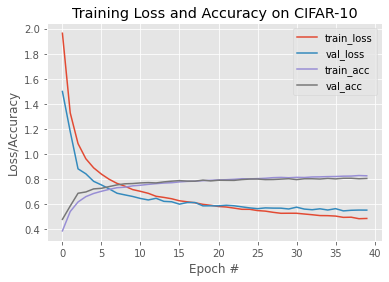

In [48]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), bn_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), bn_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), bn_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), bn_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Notice how the loss for MiniVGGNet without batch normalization starts to increase past epoch
30, indicating that the network is overfitting to the training data. We can also clearly see that
validation accuracy has become quite saturated by epoch 25.
On the other hand, the MiniVGGNet implementation with batch normalization is more stable.
While both loss and accuracy start to flatline past epoch 35, we aren’t overfitting as badly.